In [ ]:
include("Energies.jl")
include("newArrheniusEq.jl")
include("Simulation.jl")
using Plots
using Printf
using Statistics
using LinearAlgebra
gr()
display(Ea_values)

In [ ]:
T_range = 573:100:1173
flow_rates = 0.5:0.5:1.5
threshold = 0.3 # Threshold for most preferable state
t = 600 # seconds
dt = 1.0/2 # 2 layers per second (700nm/hr)
num_steps = t/dt
phase_names = ["x", "α", "β", "κ", "γ", "δ"]
effecting_nums = num_steps
decay_constant = 0.00001
#print(size(decay_coefficients))
#println("fcoeff: ", size(fcoeff))
compositions_all = []
first_run = true
for flow_rate in flow_rates
    compositions_T = []
    decay_coefficient = decay_constant * flow_rate
    fcoeff = flow_coefficient("exponential", effecting_nums, decay_coefficient)
    for T in T_range
        simulate_deposition(compositions_T, fcoeff, Ea_values, T, num_steps, dt)
    end
    if first_run == true
        compositions_all = compositions_T
        first_run = false
    else
        compositions_all = hcat(compositions_all, compositions_T)
    end
    print("compositions_all",size(compositions_all))
end
display(compositions_all[1])
display(compositions_all[3])


In [ ]:
max_compositions = most_preferable_state.(compositions_all, Ref(threshold), Ref(phase_names))
max_compositions[1,1] = "x"
max_compositions[1,2] = "β"
display(max_compositions)

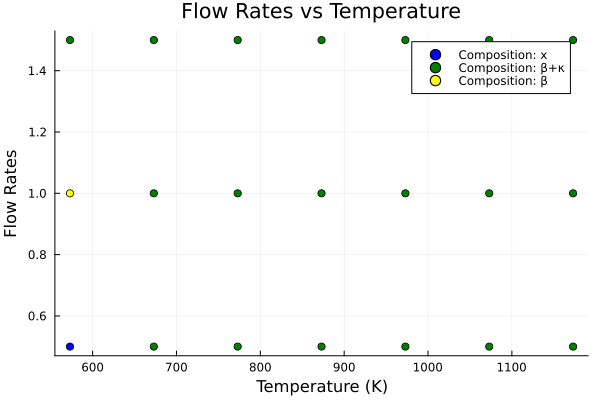

In [13]:

# Create a list of colors
colorlist = ["red", "blue", "green", "yellow", "orange", "purple", "cyan", "magenta", "black", "gray"]

# Assign Colors
unique_values = unique(max_compositions)
color_dict = Dict(unique_values[i] => colorlist[i % length(colorlist) + 1] for i in 1:length(unique_values))

# Create a scatter canvas
p = scatter([], [], xlabel="Temperature (K)", ylabel="Flow Rates", title="Flow Rates vs Temperature", label=false)  # Create an empty scatter plot with no label
for (i, T) in enumerate(T_range)
    for (j, flow_rate) in enumerate(flow_rates)
        color = color_dict[max_compositions[i, j]]  # Get the color based on the max_composition
        scatter!(p, [T], [flow_rate], color=color, label=false)
    end
end

# Add Legend
for (i, value) in enumerate(unique_values)
    scatter!(p, [], [], color=color_dict[value], label="Composition: $value")  # Add an empty scatter plot with the correct color and label
end

display(p)